In [1]:
# Install TensorFlow
#python 3.7.16
!pip install tensorflow==2.4.0
!pip install matplotlib
import tensorflow as tf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 18.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 22.2 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 31.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 kB 2.3 MB/s eta 0:00:00


In [2]:
# Define Constants
batch_size = 128
num_classes = 10
epochs = 100

In [3]:
# Load MNIST data, split between train and test sets
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples


In [4]:
# convert class vectors to binary class matrices -> one hot encoding shape
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [5]:
# Build the tf.keras.Sequential model by stacking layers.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

2024-12-01 21:26:21.913940: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2024-12-01 21:26:21.914106: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
# Save the best model as digits_model.h5
modelCheckpoint = tf.keras.callbacks.ModelCheckpoint('digits_model.h5', save_best_only=True)

# Define a callback to monitor val_loss
monitor_val_lose = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                       patience=5)

In [7]:
# Train the model using the early stopping callback
history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test),
                    epochs=epochs, batch_size=batch_size,
                    callbacks=[monitor_val_lose,modelCheckpoint])

2024-12-01 21:26:22.087790: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/100
469/469 [==============================] - 1s 2ms/step - loss: 0.6692 - accuracy: 0.8044 - val_loss: 0.1912 - val_accuracy: 0.9447
Epoch 2/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1961 - accuracy: 0.9439 - val_loss: 0.1344 - val_accuracy: 0.9591
Epoch 3/100
469/469 [==============================] - 1s 1ms/step - loss: 0.1413 - accuracy: 0.9592 - val_loss: 0.1104 - val_accuracy: 0.9678
Epoch 4/100
469/469 [==============================] - 0s 1ms/step - loss: 0.1143 - accuracy: 0.9655 - val_loss: 0.0946 - val_accuracy: 0.9721
Epoch 5/100
469/469 [==============================] - 0s 974us/step - loss: 0.0973 - accuracy: 0.9709 - val_loss: 0.0840 - val_accuracy: 0.9744
Epoch 6/100
469/469 [==============================] - 0s 973us/step - loss: 0.0811 - accuracy: 0.9759 - val_loss: 0.0810 - val_accuracy: 0.9736
Epoch 7/100
469/469 [==============================] - 0s 1ms/step - loss: 0.0733 - accuracy: 0.9773 - val_loss: 0.0738 - val_accuracy: 0.

313/313 - 0s - loss: 0.0665 - accuracy: 0.9812


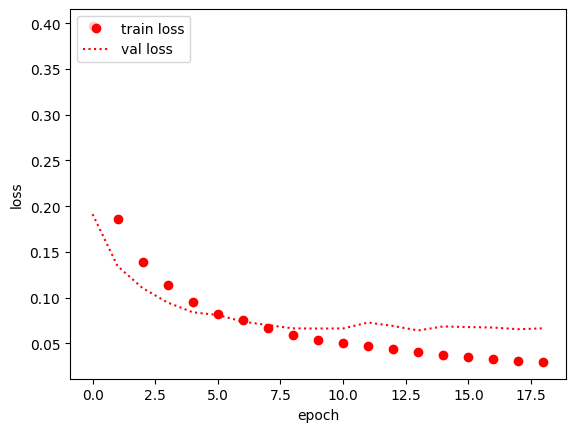

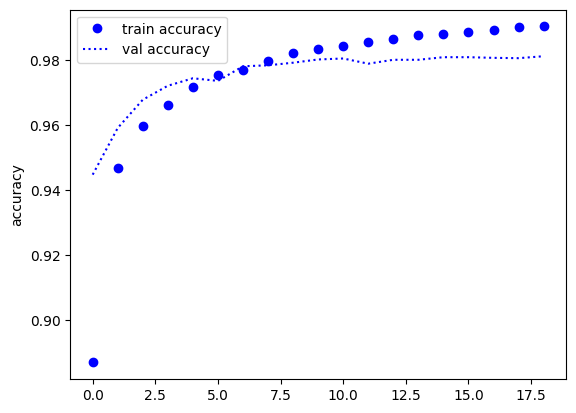

In [8]:
# Show History
model.evaluate(x_test,  y_test, verbose=2)

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
fig, acc_ax = plt.subplots()

loss_ax.plot(history.history['loss'], 'ro', label='train loss')
loss_ax.plot(history.history['val_loss'], 'r:', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(history.history['accuracy'], 'bo', label='train accuracy')
acc_ax.plot(history.history['val_accuracy'], 'b:', label='val accuracy')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [9]:
# Predict Model
import numpy as np
selected_digit = 0

result = model.predict(np.array([x_test[selected_digit]]))
result_number = np.argmax(result)
y_test_digit = y_test[selected_digit]
y_test_number = np.argmax(y_test_digit)
print(result, result_number)
print(y_test_digit, y_test_number)

[[5.8839877e-10 1.4700334e-10 2.9815883e-09 1.8394200e-06 1.3566754e-14
  2.0236320e-10 6.6813218e-17 9.9999821e-01 1.3539310e-09 3.4179664e-08]] 7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] 7


[5.883988e-10, 1.4700334e-10, 2.9815883e-09, 1.83942e-06, 1.3566754e-14, 2.023632e-10, 6.681322e-17, 0.9999982, 1.353931e-09, 3.4179664e-08]


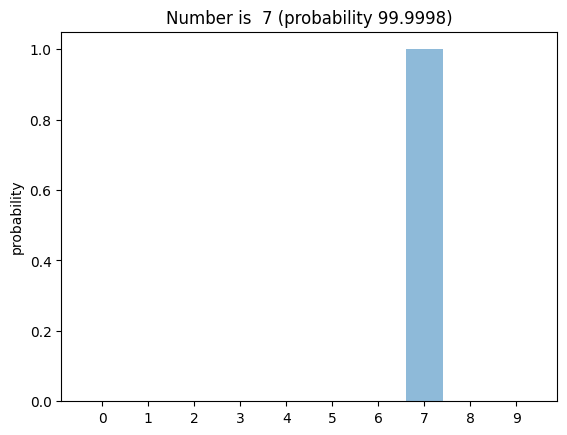

In [10]:
# Show Predicted Number
digits = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')
y_pos = np.arange(len(digits))
performance = [ val for val in result[0]]
print(performance)
result_probability = performance[result_number]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, digits)
plt.ylabel('probability')
plt.title('Number is %2i (probability %7.4f)' % (result_number, result_probability*100))

plt.show()

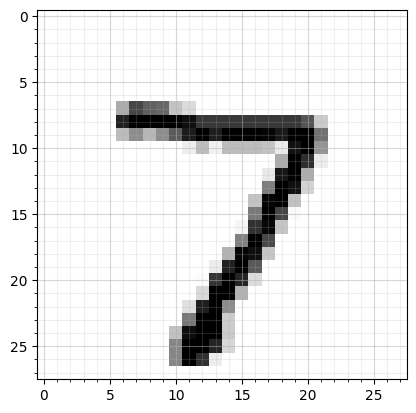

In [11]:
# Draw digit image
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 29, 5)
minor_ticks = np.arange(0, 29, 1)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)
ax.set_yticks(major_ticks)
ax.set_yticks(minor_ticks, minor=True)

# And a corresponding grid
ax.grid(which='both')

# Or if you want different settings for the grids:
ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)

ax.imshow(x_test[selected_digit], cmap=plt.cm.binary)

plt.show()

In [12]:
print(x_test[selected_digit])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    